In [27]:
library(tidyverse)
library(RColorBrewer)
library(repr)

star_data <- read_csv("https://raw.githubusercontent.com/luigivicencio/dsci100-003-008/main/HTRU_2.csv", col_names = FALSE) |>
    rename("mean_ip" = X1, "sd_ip" = X2, "kurtosis_ip" = X3, 
           "skew_ip" = X4, "mean_dmsnr" = X5, "sd_dmsnr" = X6, 
           "kurtosis_dmsnr" = X7, "skew_dmsnr" = X8, "pulsar" = X9)|>
    mutate(pulsar = as_factor(pulsar)) |>
    mutate(pulsar = fct_recode(pulsar,"No" = "0", "Yes" = "1"))


star_data

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_ip   sd_ip    kurtosis_ip  skew_ip     mean_dmsnr  sd_dmsnr 
1     140.56250 55.68378 -0.234571412 -0.69964840  3.1998328  19.110426
2     102.50781 58.88243  0.465318154 -0.51508791  1.6772575  14.860146
3     103.01562 39.34165  0.323328365  1.05116443  3.1212375  21.744669
4     136.75000 57.17845 -0.068414638 -0.63623837  3.6429766  20.959280
5      88.72656 40.67223  0.600866079  1.12349169  1.1789298  11.468720
6      93.57031 46.69811  0.531904850  0.41672112  1.6362876  14.545074
7     119.48438 48.76506  0.031460220 -0.11216757  0.9991639   9.279612
8     130.38281 39.84406 -0.158322759  0.38954045  1.2207358  14.378941
9     107.25000 52.62708  0.452688025  0.17034738  2.3319398  14.486853
10    107.25781 39.49649  0.465881961  1.16287712  4.0794314  24.980418
11    142.07812 45.28807 -0.320328426  0.28395251  5.3762542  29.009897
12    133.25781 44.05824 -0.081059862  0.11536151  1.6321070  12.007806
13    134.96094 49.55433 -0.135303833 -0.08046960 10.6964883  41.342044
14    117.94531 45.50658  0.325437564  0.66145946  2.8361204  23.118350
15    138.17969 51.52448 -0.031852329  0.04679717  6.3302676  31.576347
16    114.36719 51.94572 -0.094498904 -0.28798409  2.7382943  17.191891
17    109.64062 49.01765  0.137635830 -0.25669978  1.5083612  12.072901
18    100.85156 51.74352  0.393836792 -0.01124074  2.8411371  21.635778
19    136.09375 51.69100 -0.045908926 -0.27181639  9.3428094  38.096400
20     99.36719 41.57220  1.547196967  4.15410604 27.5551839  61.719016
21    100.89062 51.89039  0.627486528 -0.02649780  3.8837793  23.045267
22    105.44531 41.13997  0.142653801  0.32041968  3.5518395  20.755017
23     95.86719 42.05992  0.326386917  0.80350179  1.8327759  12.248969
24    117.36719 53.90861  0.257953441 -0.40504908  6.0183946  24.766123
25    106.64844 56.36718  0.378355072 -0.26637161  2.4364549  18.405371
26    112.71875 50.30127  0.279390953 -0.12901071  8.2817726  37.810012
27    130.85156 52.43286  0.142596727  0.01888544  2.6463211  15.654436
28    119.43750 52.87482 -0.002549267 -0.46036029  2.3653846  16.498032
29    123.21094 51.07801  0.179376819 -0.17728516  2.1070234  16.921773
30    102.61719 49.69235  0.230438984  0.19332537  1.4891304  16.004411
⋮     ⋮         ⋮        ⋮            ⋮           ⋮           ⋮        
17869  96.85938 49.82277  0.276811333 -0.33182398   1.7441472 14.764022
17870 137.37500 50.76278  0.085075173 -0.09267941   7.5610368 33.471080
17871 110.76562 55.34219  0.066099851 -0.50041490  14.3795987 45.320742
17872 119.00781 52.09104  0.215293531 -0.02022867   2.0125418 18.754594
17873 139.89844 44.28103 -0.044618449  0.10084109   1.1396321 11.196096
17874  89.45312 35.84883  0.731655618  3.10147356   1.4506689 14.204964
17875 126.55469 54.27589  0.207825362 -0.19168640   2.2943144 17.429850
17876 133.14062 43.70618 -0.012686084  0.23239435   2.0919732 13.489370
17877 111.76562 52.94359  0.671723986  0.38359393 149.8436455 97.926948
17878 118.29688 49.93282  0.144400986 -0.26927317   1.0418060 10.199265
17879  90.14844 40.78604  0.457138562  0.88551621   5.3545150 29.759511
17880 107.66406 44.46246  0.296045688  0.22776530   6.2909699 33.512873
17881 105.49219 43.50072  0.154180228  0.40811660   2.3160535 19.098507
17882 130.50000 46.14955  0.084445004 -0.10735478   1.5292642 11.757086
17883 131.00000 55.93579 -0.023598123 -0.53665128   1.1596990 10.856794
17884  84.42188 41.77556  0.757467101  1.10707476   1.3361204 12.026757
17885 106.87500 47.57133  0.199440015  0.28496422   3.0794314 20.984455
17886 133.82031 43.47816  0.136691092  0.35312123   0.9824415  9.486068
17887 127.07031 47.66356  0.006552426 -0.12363370   0.8536789 11.197206
17888 121.37500 53.24516  0.103772205 -0.36511875   1.0953177 12.239976
17889  98.72656 50.40782  0.565123614  0.24523085   0.5702341  9.011285
17890 126.62500 55.72183  0.002946216 -0.30321814   0.5342809  8.588882
17891 143.67188 45.30265 -0.045768538  0.35364267   5.1739130 26.462345
17892 118.48438 50.60848 -0.029058829 -0.02749

In [28]:
star_table <- group_by(star_data, pulsar) |>
    summarize(count = n(),
             missing_values = sum(is.na(star_data)), # check that
             mean_mean_ip = mean(mean_ip), # check that
             mean_sd_ip = mean(sd_ip),
             mean_skew_ip = mean(skew_ip),
             mean_kurtosis_ip = mean(kurtosis_ip),
             mean_mean_dmsnr = mean(mean_dmsnr),
             mean_sd_dmsnr = mean(sd_dmsnr),
             mean_skew_dmsnr = mean(skew_dmsnr),
             mean_kurtosis_dmsnr = mean(kurtosis_dmsnr))

star_table

pulsar count missing_values mean_mean_ip mean_sd_ip mean_skew_ip
1 No     16259 0              116.56273    47.33974    0.380844   
2 Yes     1639 0               56.69061    38.71060   15.553576   
  mean_kurtosis_ip mean_mean_dmsnr mean_sd_dmsnr mean_skew_dmsnr
1 0.2104401         8.863258       23.28798      113.62034      
2 3.1306554        49.825995       56.46896       17.93173      
  mean_kurtosis_dmsnr
1 8.862674           
2 2.757069

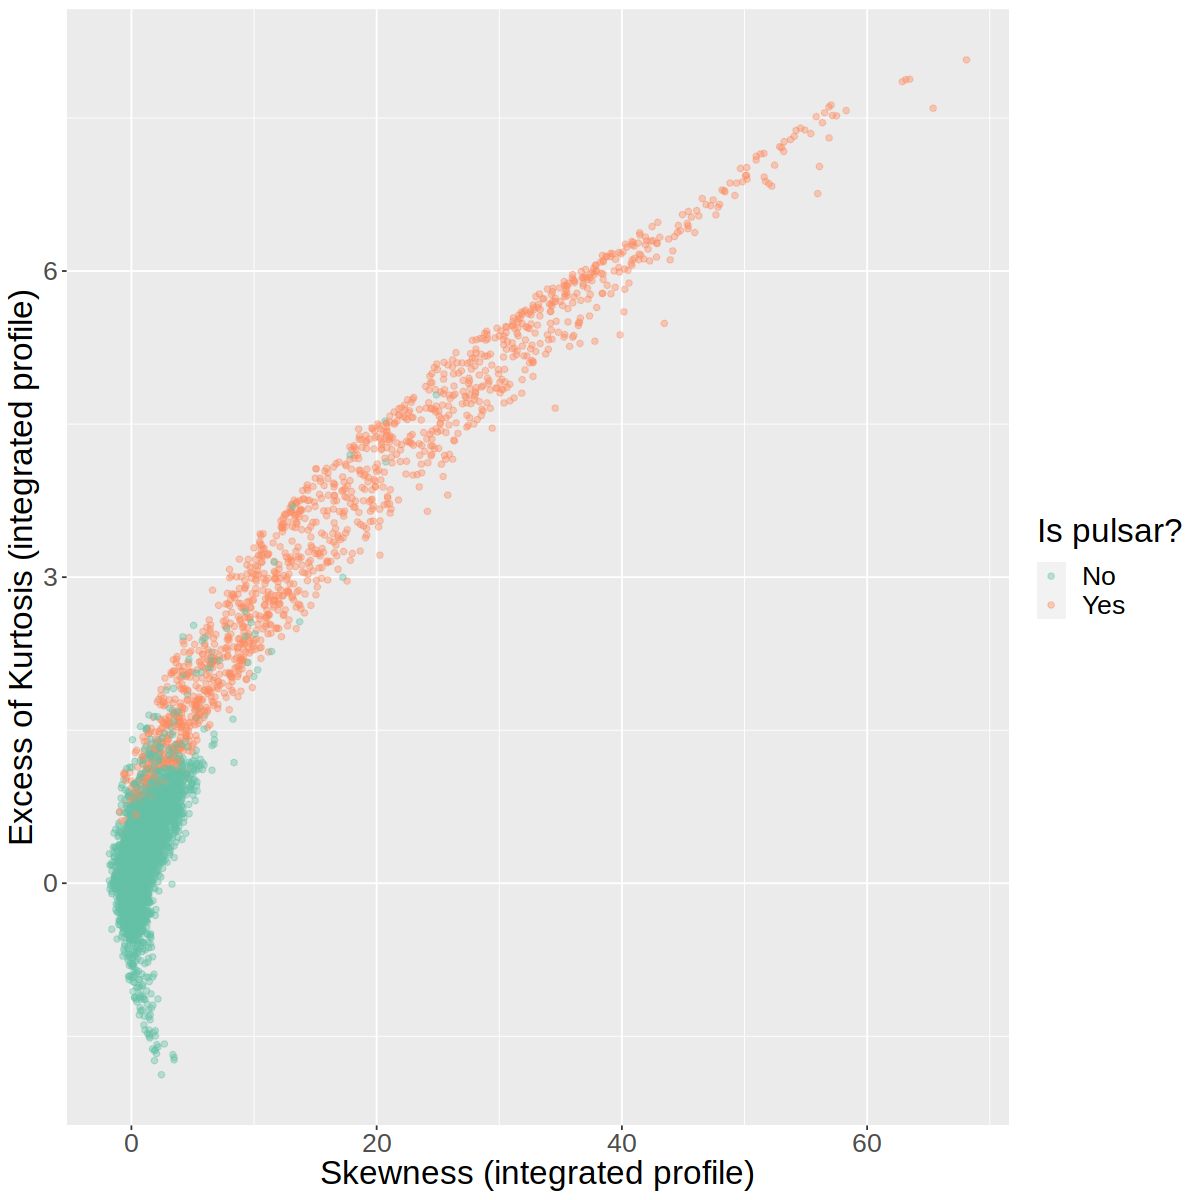

In [29]:
options(repr.plot.width = 10, repr.plot.height = 10)

star_plot_skew <- ggplot (star_data, aes(x = skew_ip, y = kurtosis_ip, color = pulsar)) +
                geom_point(alpha = 0.4) +
                labs(y = "Excess of Kurtosis (integrated profile)", x = "Skewness (integrated profile)", color = "Is pulsar?") + 
                theme(text = element_text(size = 20)) + 
                scale_color_brewer(palette = "Set2")


star_plot_skew